## Assignment

### Task 1

#### This assignment is for visualization using matplotlib:

#### data to use:

#### url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

#### titanic = pd.read_csv(url)

#### Charts to plot:

#### 1. Create a pie chart presenting the male/female proportion

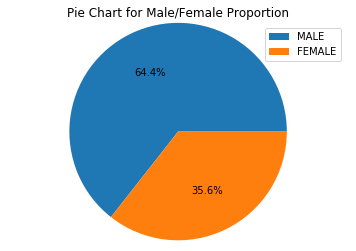

In [2]:
# import libraries and data
import pandas as pd
import matplotlib.pyplot as plt

# read the data
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head(10)

# extract counts
total_count = titanic.groupby('sex')['sex'].count()
male_count = total_count['male']
female_count = total_count['female']

#plot pichart
plt.title('Pie Chart for Male/Female Proportion')
plt.axis('equal')
plt.pie([male_count,female_count],autopct='%.1f%%', radius=1.25)
plt.legend(labels=['MALE','FEMALE'])
plt.show()

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

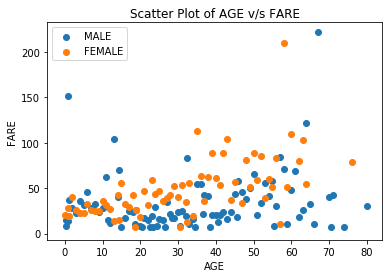

In [3]:
grp = titanic.groupby(["age", "sex"])
grp_unstack = grp.mean()['fare'].unstack()

# mean fare for all MALE passengers by age
g1 = grp_unstack.male.values

# mean fare for all FEMALE passengers by age
g2 = grp_unstack.female.values

# age
g3 = grp_unstack.index.values

# plotting the graph
plt.title('Scatter Plot of AGE v/s FARE')
plt.xlabel('AGE')
plt.ylabel('FARE')
plt.scatter(g3, g1)
plt.scatter (g3, g2)
plt.legend(labels=['MALE','FEMALE'])
plt.show()

### Task 2

#### It happens all the time: someone gives you data containing malformed strings, Python, lists and
#### missing data. How do you tidy it up so you can get on with the analysis?

#### Take this monstrosity as the DataFrame to use in the following puzzles:

#### df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
#### 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
#### 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
#### 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


#### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [5]:
df.FlightNumber=df.FlightNumber.fillna(method='ffill',downcast='infer',)+np.where(df.FlightNumber.isnull()==True,10,0)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [6]:
df.dtypes

From_To         object
FlightNumber     int64
RecentDelays    object
Airline         object
dtype: object

#### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [7]:
df_temp=df
s = df['From_To'].apply(lambda x: x.split('_'))
df['From'] = s.apply(lambda x: x[0])
df['To'] = s.apply(lambda x: x[1])

df_temp

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


#### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [8]:
df_temp['From']=df.From.str.title()
df_temp['To']=df.To.str.title()
df_temp

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,10055,[],<Air France> (12),Madrid,Milan
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London


#### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [9]:
df = df_temp.drop('From_To', axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


#### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

#### Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [10]:
delays = pd.DataFrame(df['RecentDelays'].values.tolist(), columns=['delay1','delay2','delay3'])
df = pd.concat([df,delays],axis=1, join_axes=[df.index])
df = df.drop('RecentDelays', axis=1)
df

,FlightNumber,Airline,From,To,delay1,delay2,delay3
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN
